In [14]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [15]:
!kaggle datasets download -d shivamb/machine-predictive-maintenance-classification


Dataset URL: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification
License(s): CC0-1.0
machine-predictive-maintenance-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
import zipfile

with zipfile.ZipFile("machine-predictive-maintenance-classification.zip", "r") as zip_ref:
    zip_ref.extractall("predictive_maintenance")

In [17]:
import pandas as pd
# Charger la data
df = pd.read_csv(r"C:\Users\hp\Downloads\predictive_maintenance.csv")
#Afficher les 5 premier lignes
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# 1. Vérification et suppression des doublons
# Check les valeurs uniques 'UDI' et 'Product ID'
print("Vérification des colonnes UDI et Product ID :")
print(f"- {df['UDI'].nunique()} valeurs uniques dans 'UDI'")
print(f"- {df['Product ID'].nunique()} valeurs uniques dans 'Product ID'")
# supprimer duplicées 'UDI' et 'Product ID'
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)
print("\n Colonnes 'UDI' et 'Product ID' supprimées.\n")
# 2. IDENTIFIER LES COLONNES NUMÉRIQUES
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Colonnes numériques détectées :", numeric_cols, "\n")
# 3. FONCTION DE CORRECTION DES OUTLIERS (IQR)
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(column, lower, upper)
# 4. TRAITEMENT DES COLONNES NUMÉRIQUES
#Exclure la colonne target des colonnes numériques
numeric_cols = [col for col in numeric_cols if col != "Target"]
print("Colonnes numériques traitées :", numeric_cols, "\n")
for col in numeric_cols:
    print(f"Traitement de la colonne : {col}")
    # --- 1. Valeurs manquantes ---
    nb_missing_before = df[col].isna().sum()
    df[col] = df[col].fillna(df[col].mean())
    nb_missing_after = df[col].isna().sum()
    print(f"   • Valeurs manquantes avant : {nb_missing_before}")
    print(f"   • Valeurs manquantes après  : {nb_missing_after}")
    # --- 2. Correction des outliers IQR ---
    before_min, before_max = df[col].min(), df[col].max()
    df[col] = remove_outliers_iqr(df[col])
    after_min, after_max = df[col].min(), df[col].max()
    print(f"   • Min avant correction : {before_min}")
    print(f"   • Max avant correction : {before_max}")
    print(f"   • Min après correction : {after_min}")
    print(f"   • Max après correction : {after_max}\n")

Vérification des colonnes UDI et Product ID :
- 10000 valeurs uniques dans 'UDI'
- 10000 valeurs uniques dans 'Product ID'

 Colonnes 'UDI' et 'Product ID' supprimées.

Colonnes numériques détectées : ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'] 

Colonnes numériques traitées : ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] 

Traitement de la colonne : Air temperature [K]
   • Valeurs manquantes avant : 0
   • Valeurs manquantes après  : 0
   • Min avant correction : 295.3
   • Max avant correction : 304.5
   • Min après correction : 295.3
   • Max après correction : 304.5

Traitement de la colonne : Process temperature [K]
   • Valeurs manquantes avant : 0
   • Valeurs manquantes après  : 0
   • Min avant correction : 305.7
   • Max avant correction : 313.8
   • Min après correction : 305.7
   • Max après correction : 313.8

Traitement de la colon

Shape du dataset : (10000, 8)

Statistiques descriptives :
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1530.142500   
std               2.000259                 1.483734              148.798499   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             1895.500000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      39.983490       107.951000      0.033900  
std        9.914623        63.654147      0.180981  
min       12.8000

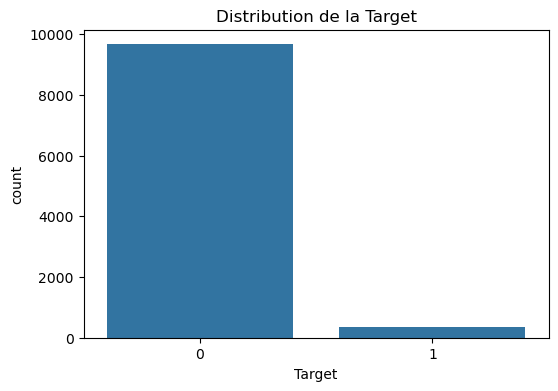

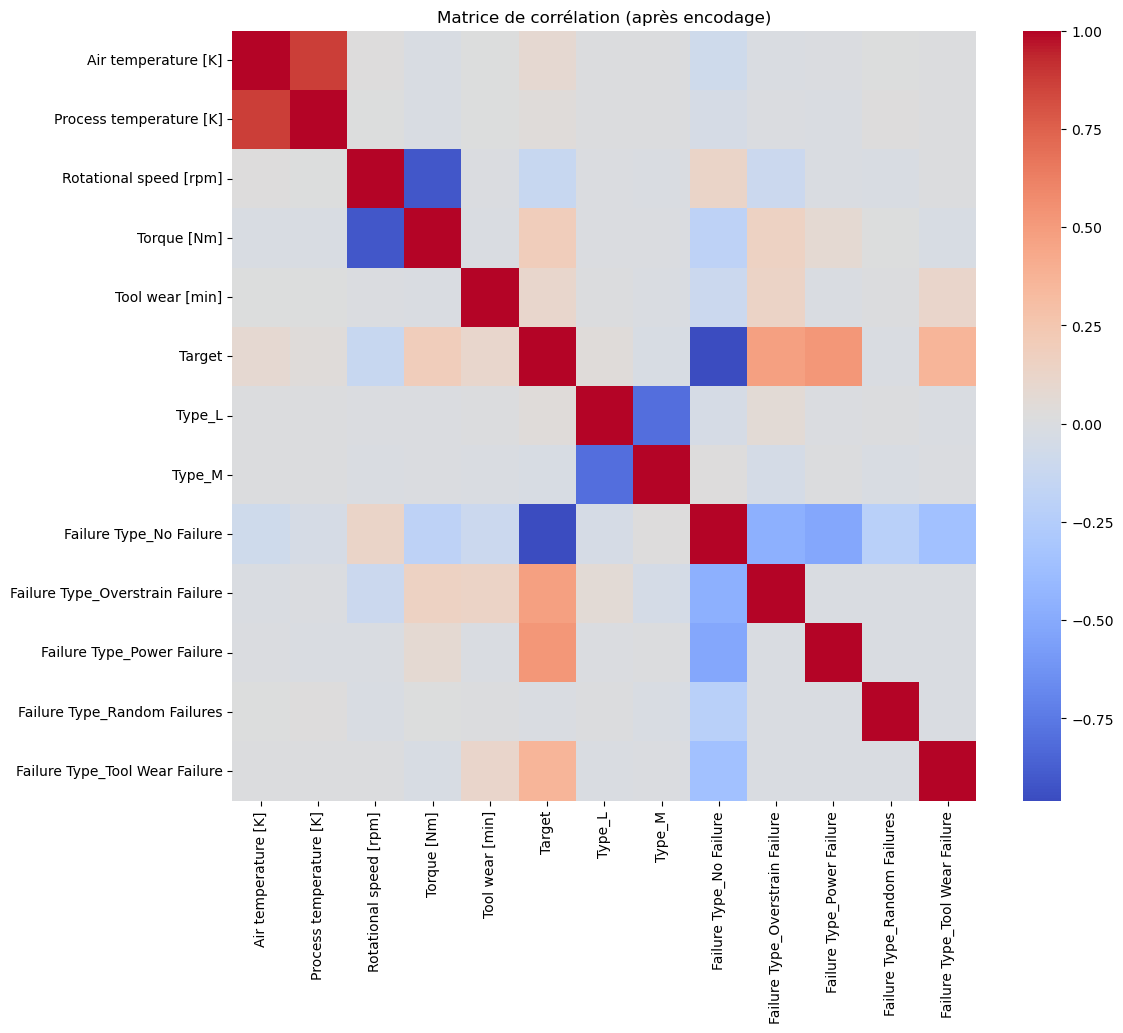

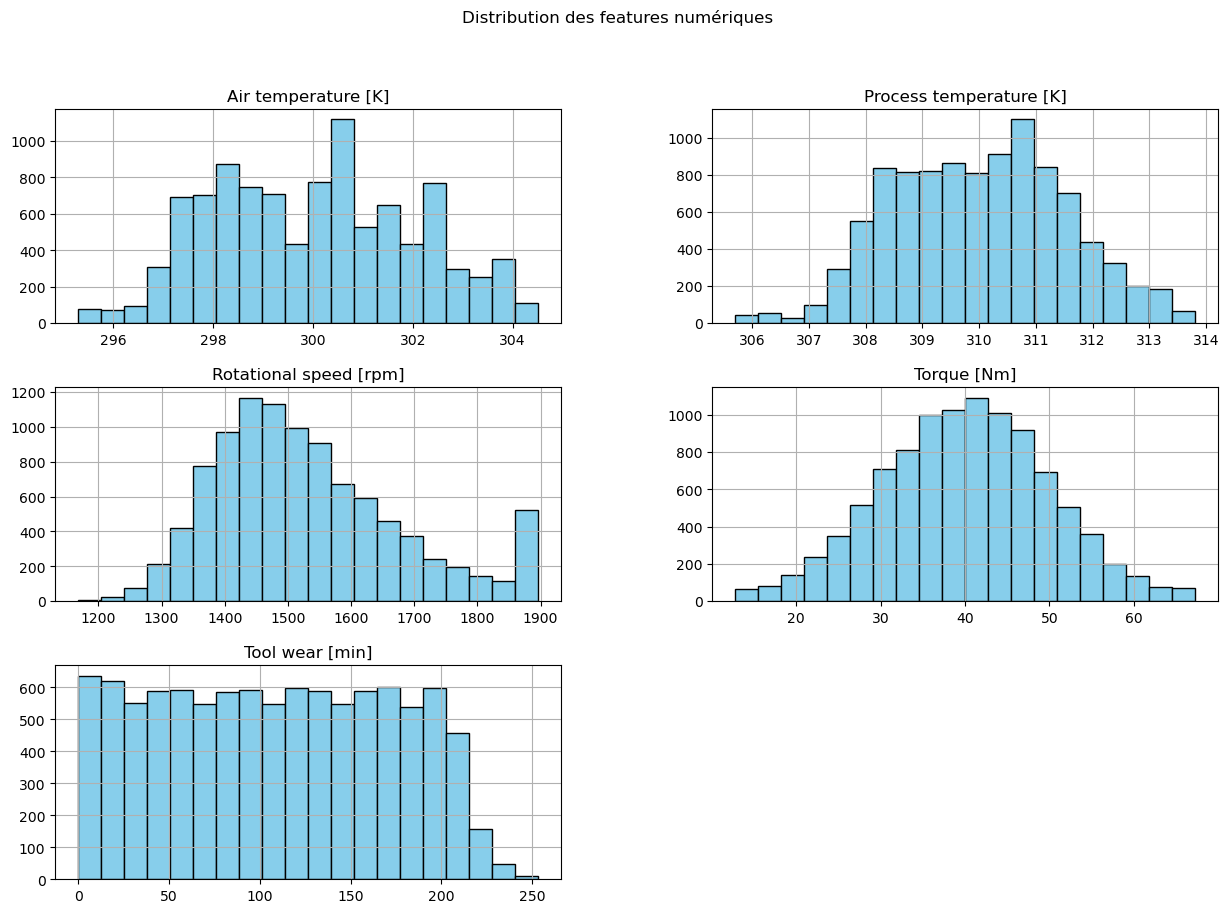

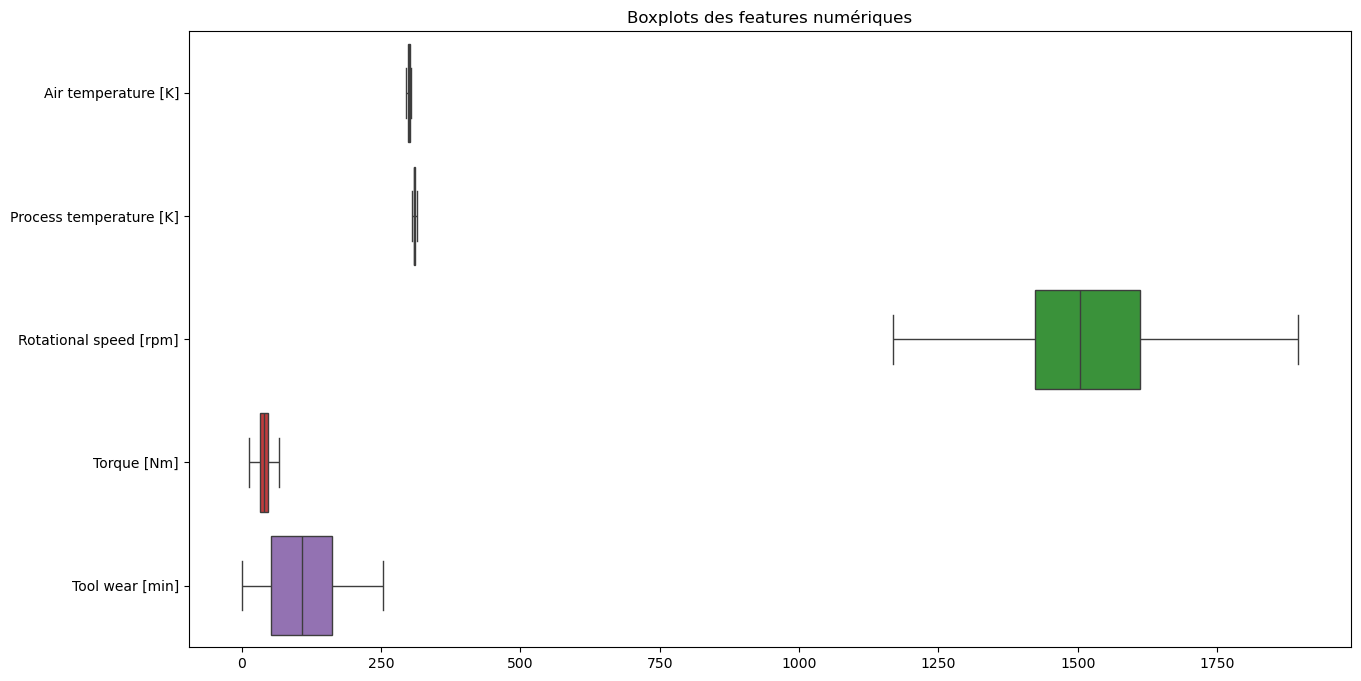

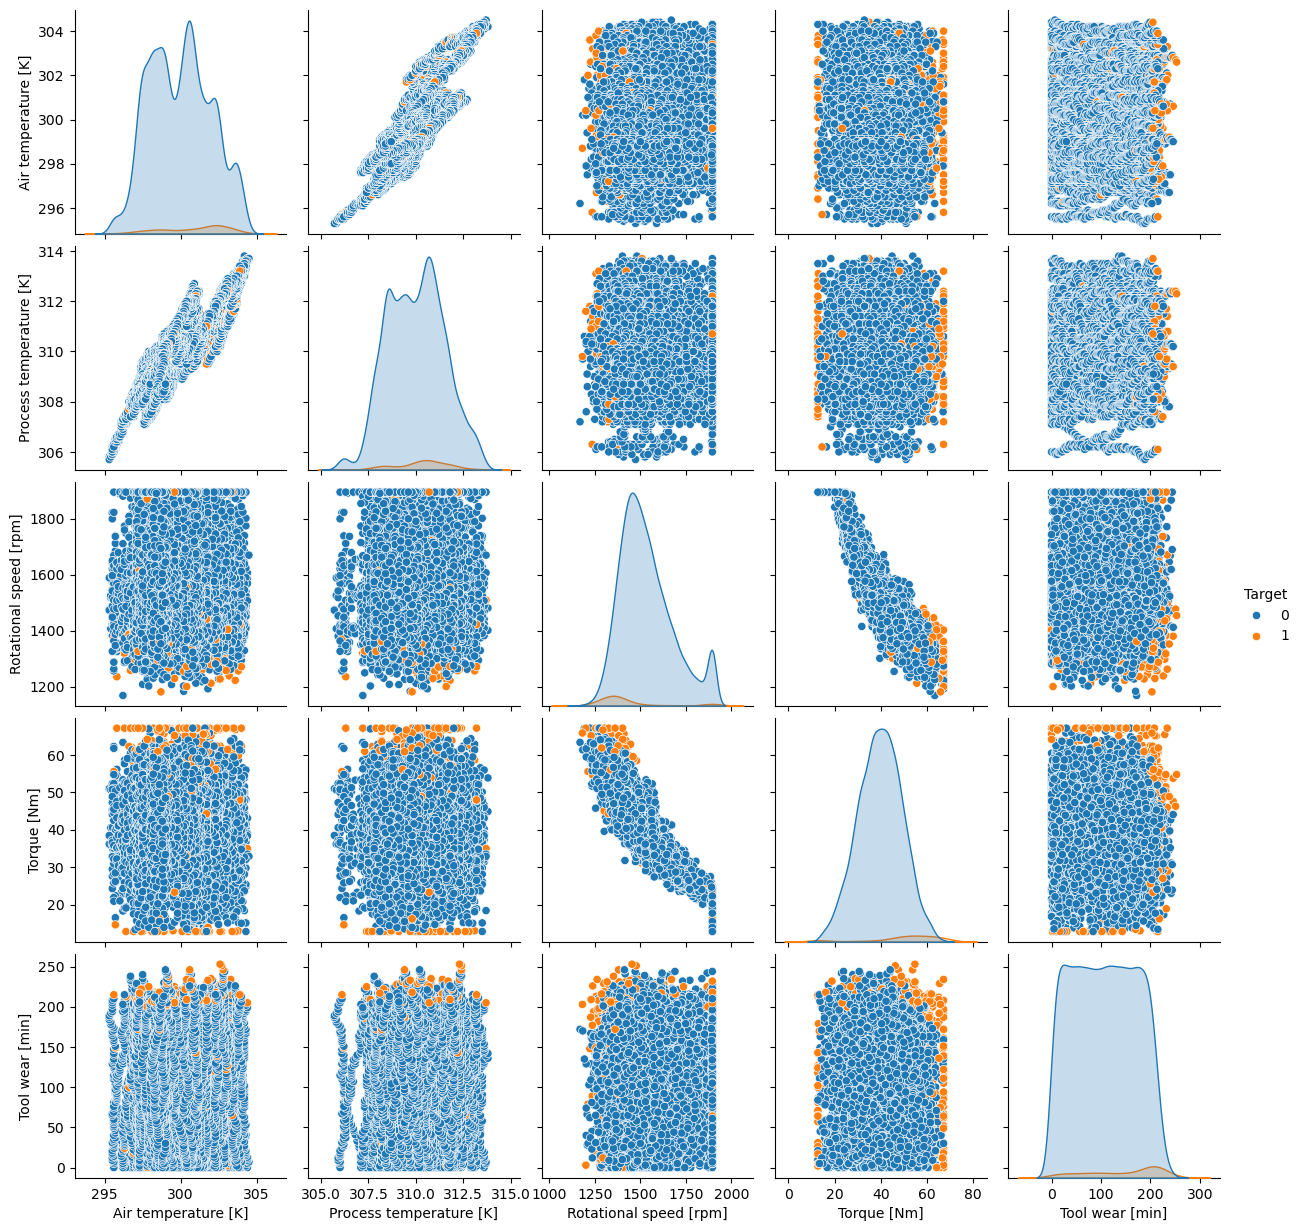

Shape du dataset : (10000, 8)

Statistiques descriptives :
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1530.142500   
std               2.000259                 1.483734              148.798499   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             1895.500000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      39.983490       107.951000      0.033900  
std        9.914623        63.654147      0.180981  
min       12.8000

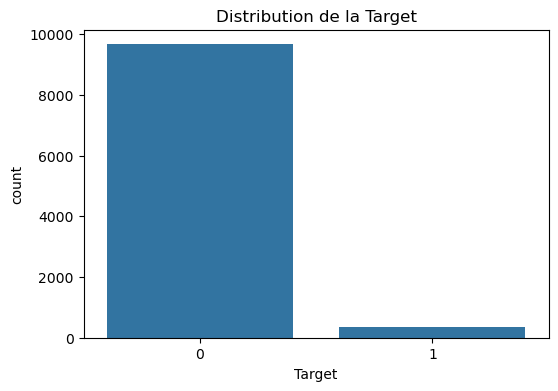

In [19]:
# ------------------ 5. Encodage des variables catégorielles pour corrélation/pairplot ------------------
df_encoded = pd.get_dummies(df, drop_first=True)

# ------------------ 6. EDA ------------------

# 6.1 Aperçu général
print("Shape du dataset :", df.shape)
print("\nStatistiques descriptives :")
print(df.describe())

# 6.2 Distribution de la target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target')
plt.title("Distribution de la Target")
plt.show()

# 6.3 Heatmap des corrélations
plt.figure(figsize=(12,10))
corr = df_encoded.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation (après encodage)")
plt.show()

# 6.4 Histogrammes des features numériques
df[numeric_cols].hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des features numériques")
plt.show()

# 6.5 Boxplots pour visualiser les outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplots des features numériques")
plt.show()
# Choisir 6 features numériques scalaires
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns[:6]
cols_for_pairplot = list(numeric_features) + ['Target']

# Créer un nouveau DataFrame pour le pairplot
pairplot_df = df[numeric_features].copy()
pairplot_df['Target'] = df['Target']  # s'assurer que Target est 1D

# Convertir Target en catégorie si ce n'est pas déjà fait
pairplot_df['Target'] = pairplot_df['Target'].astype('category')

# Pairplot
sns.pairplot(pairplot_df, hue='Target', diag_kind='kde')
plt.show()
# ------------------ 5. Encodage des variables catégorielles pour corrélation/pairplot ------------------
df_encoded = pd.get_dummies(df, drop_first=True)

# ------------------ 6. EDA ------------------

# 6.1 Aperçu général
print("Shape du dataset :", df.shape)
print("\nStatistiques descriptives :")
print(df.describe())

# 6.2 Distribution de la target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target')
plt.title("Distribution de la Target")
plt.show()

# 6.3 Heatmap des corrélations

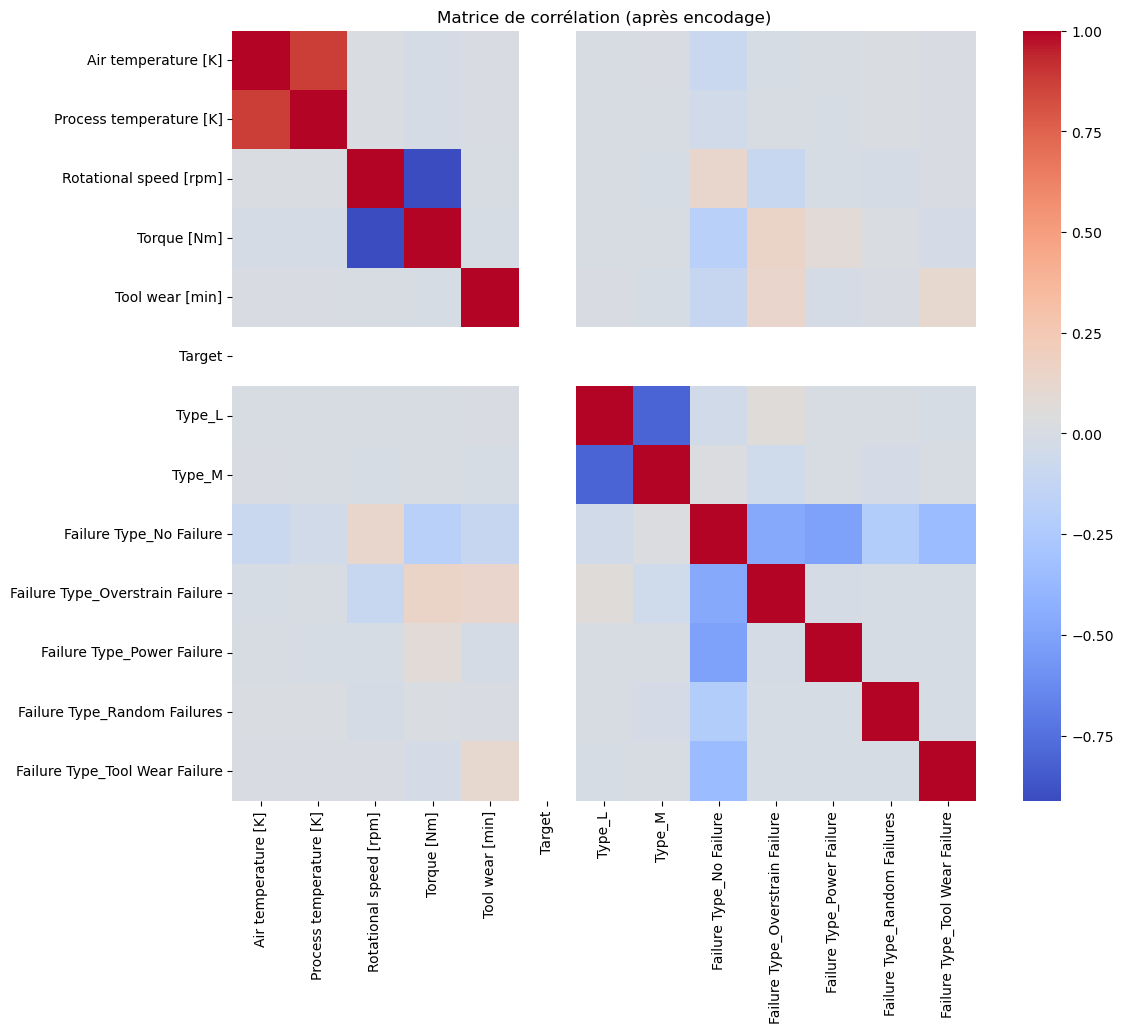

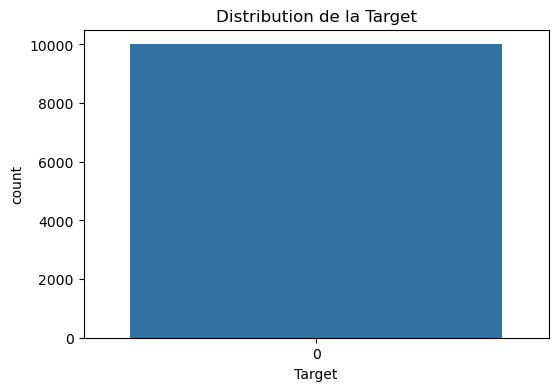

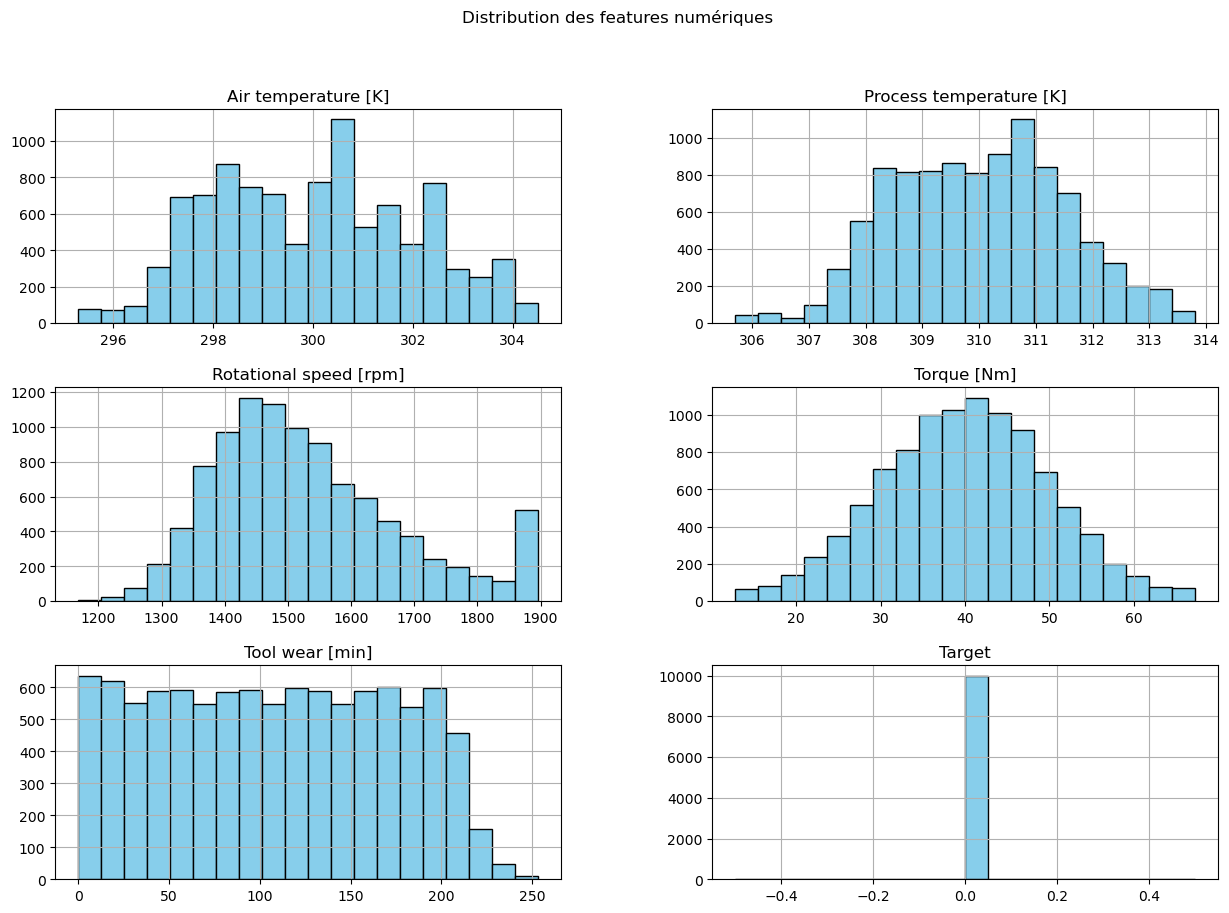

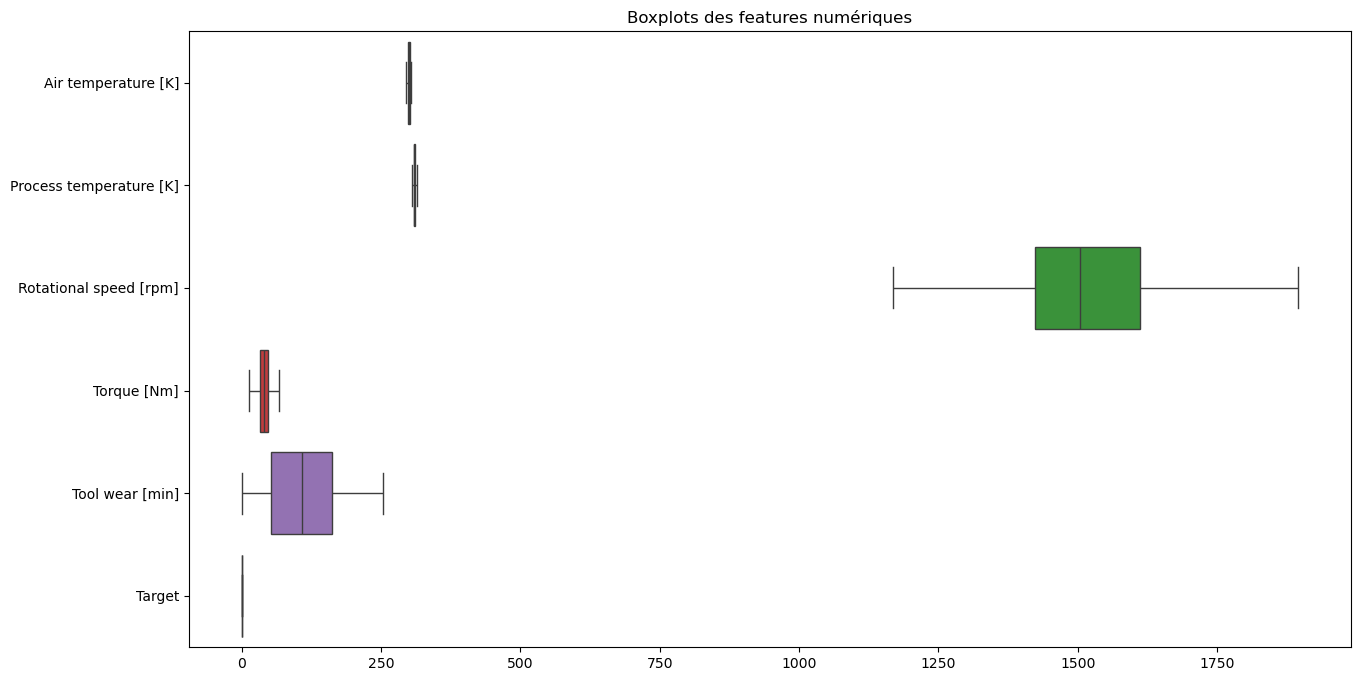

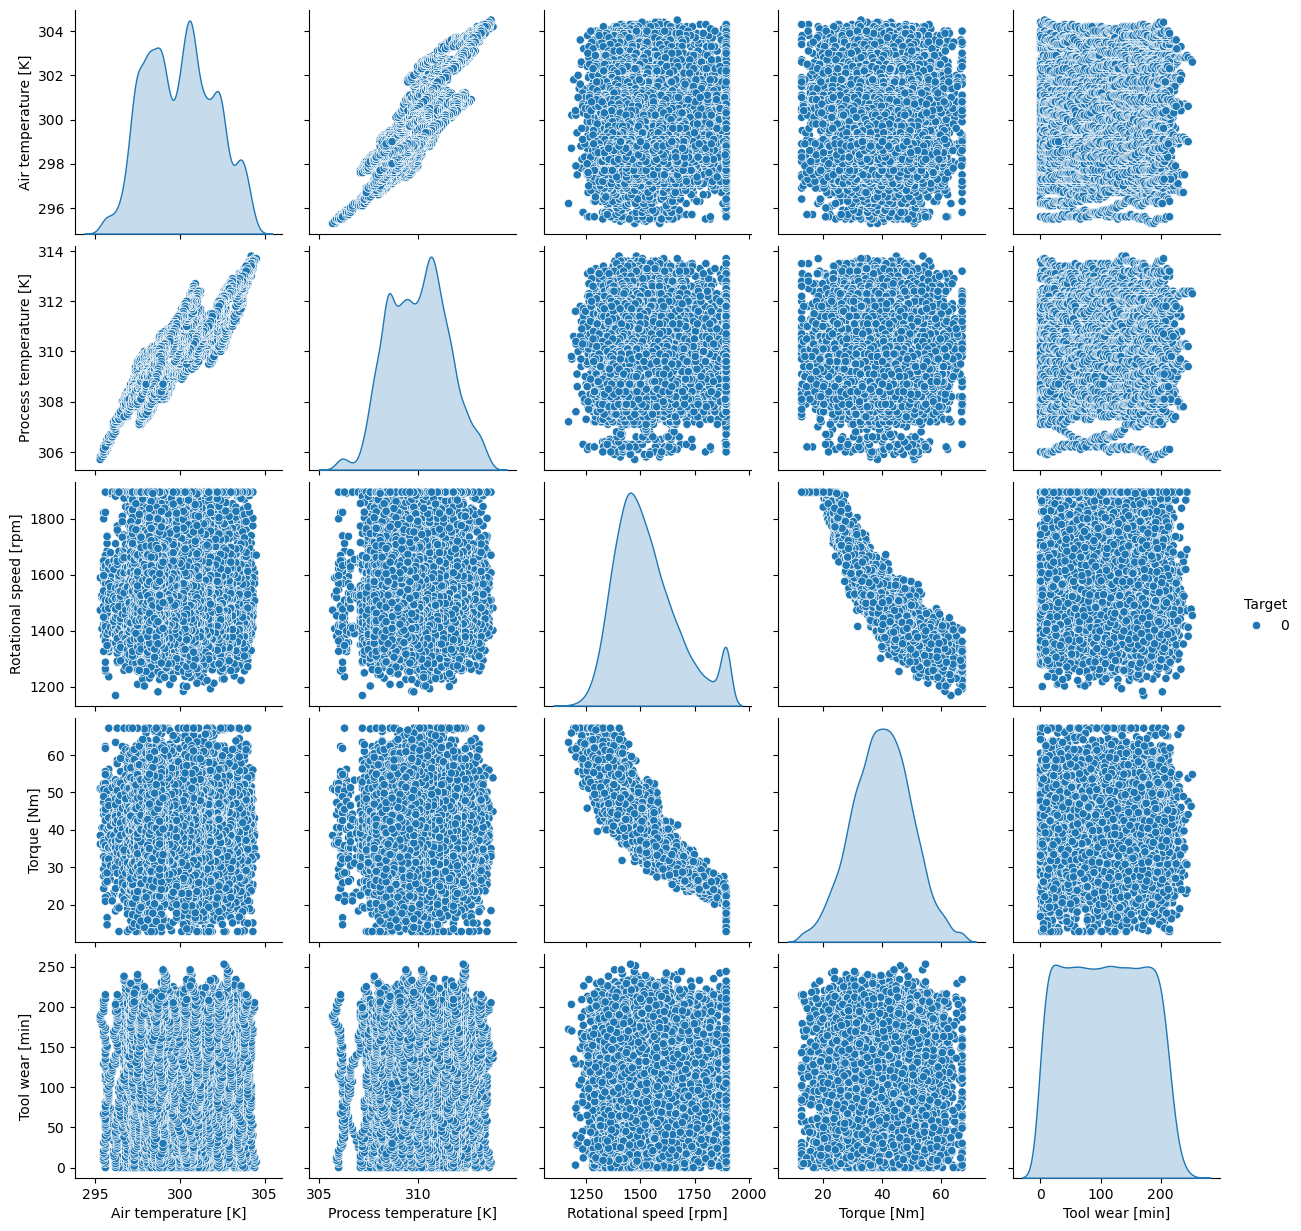

Shape du dataset : (10000, 8)

Statistiques descriptives :
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1530.142500   
std               2.000259                 1.483734              148.798499   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             1895.500000   

        Torque [Nm]  Tool wear [min]   Target  
count  10000.000000     10000.000000  10000.0  
mean      39.983490       107.951000      0.0  
std        9.914623        63.654147      0.0  
min       12.800000         0.000000 

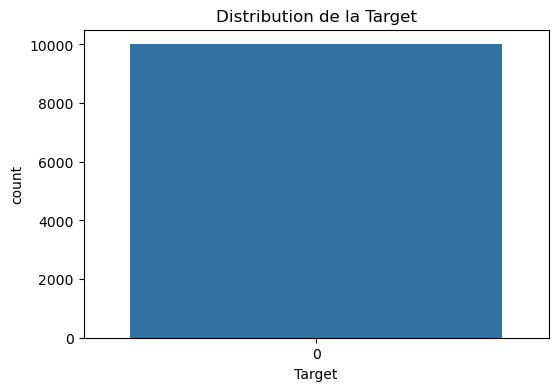

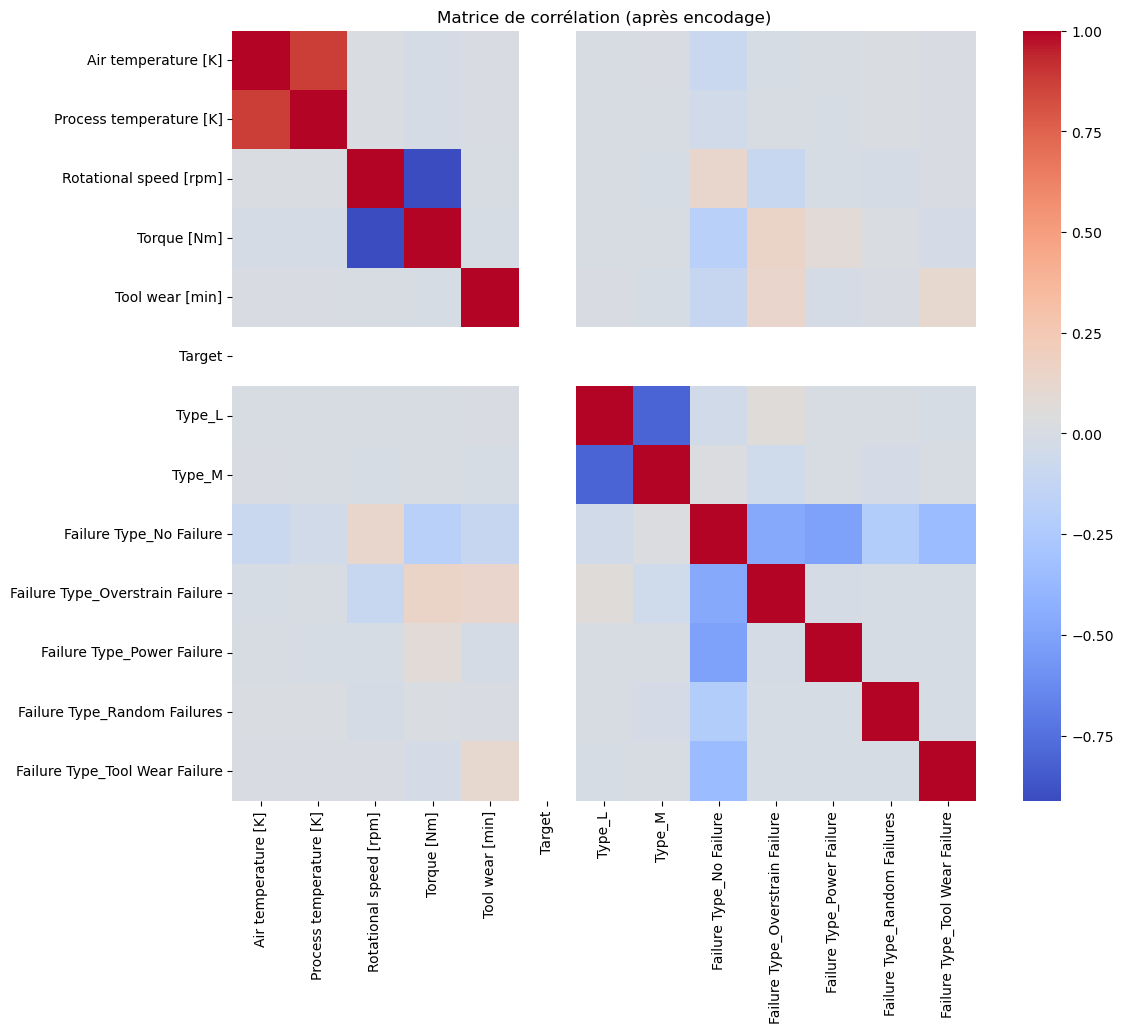

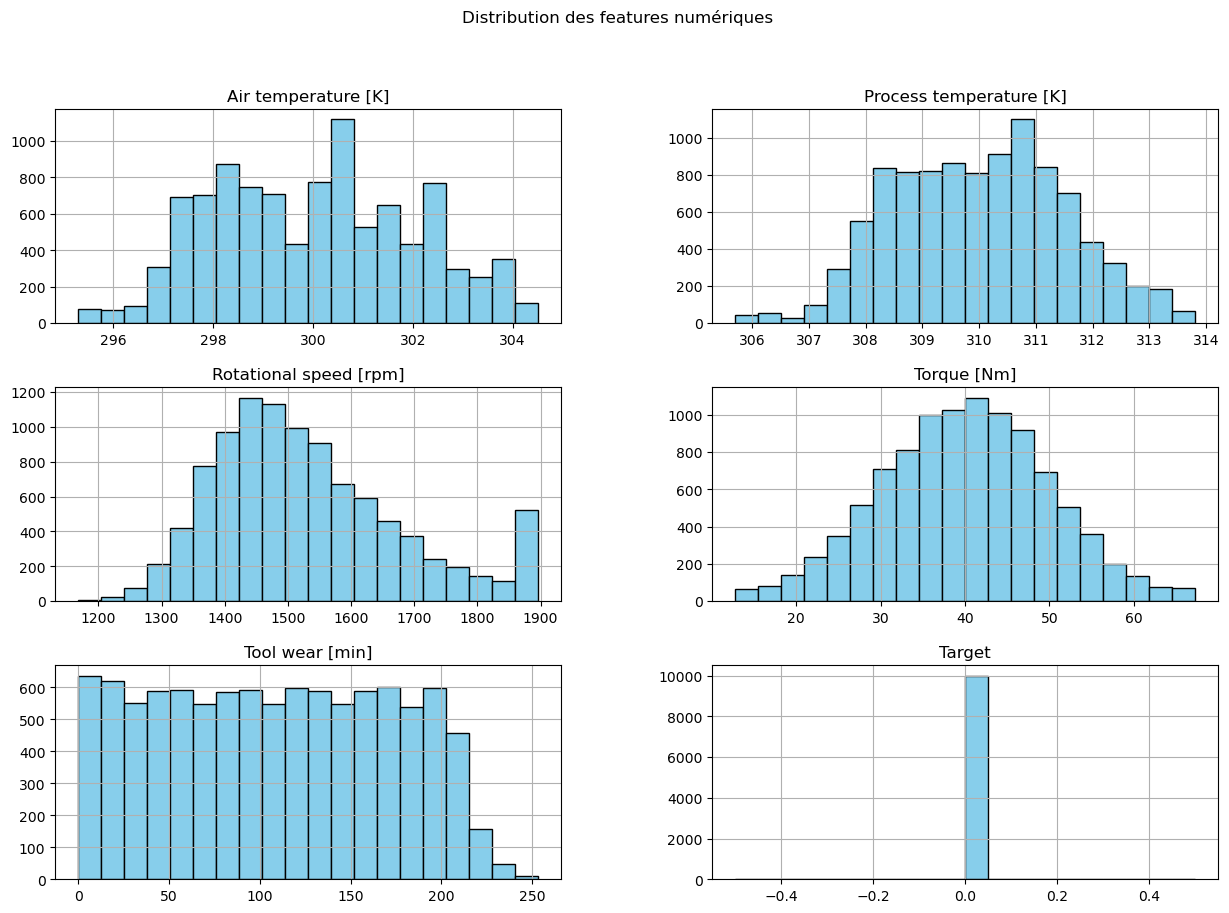

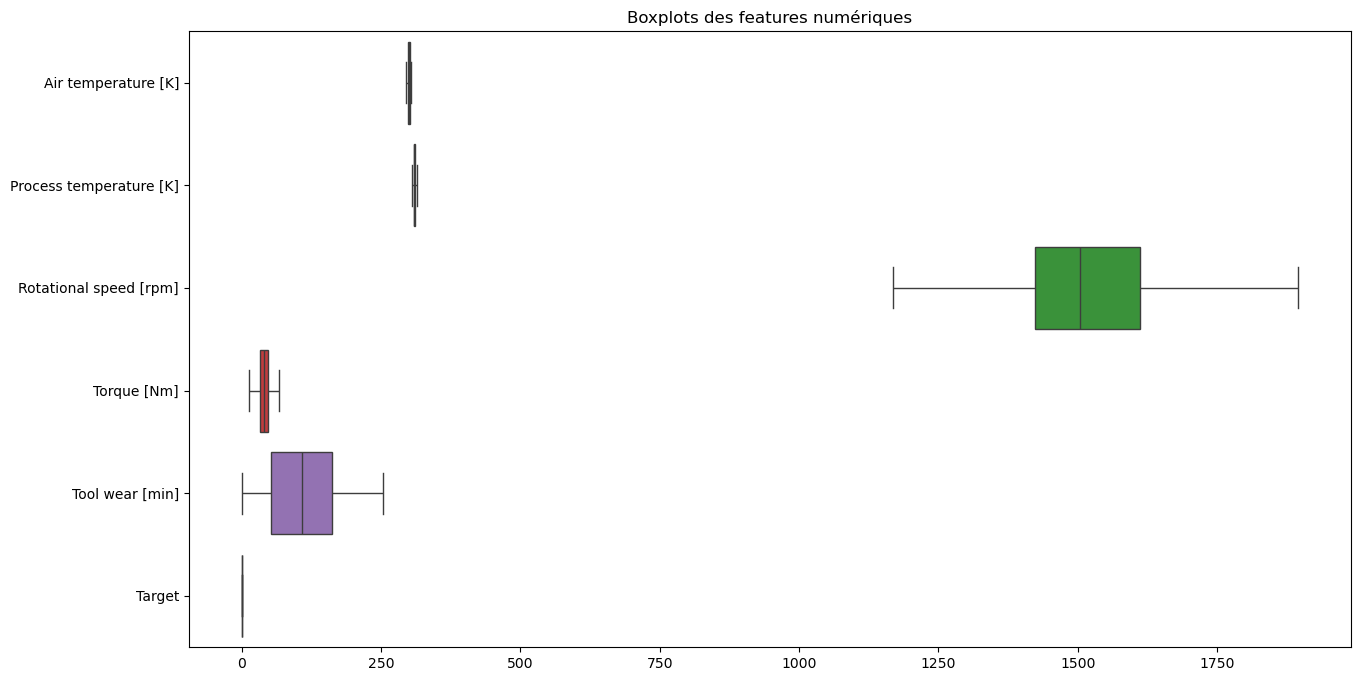

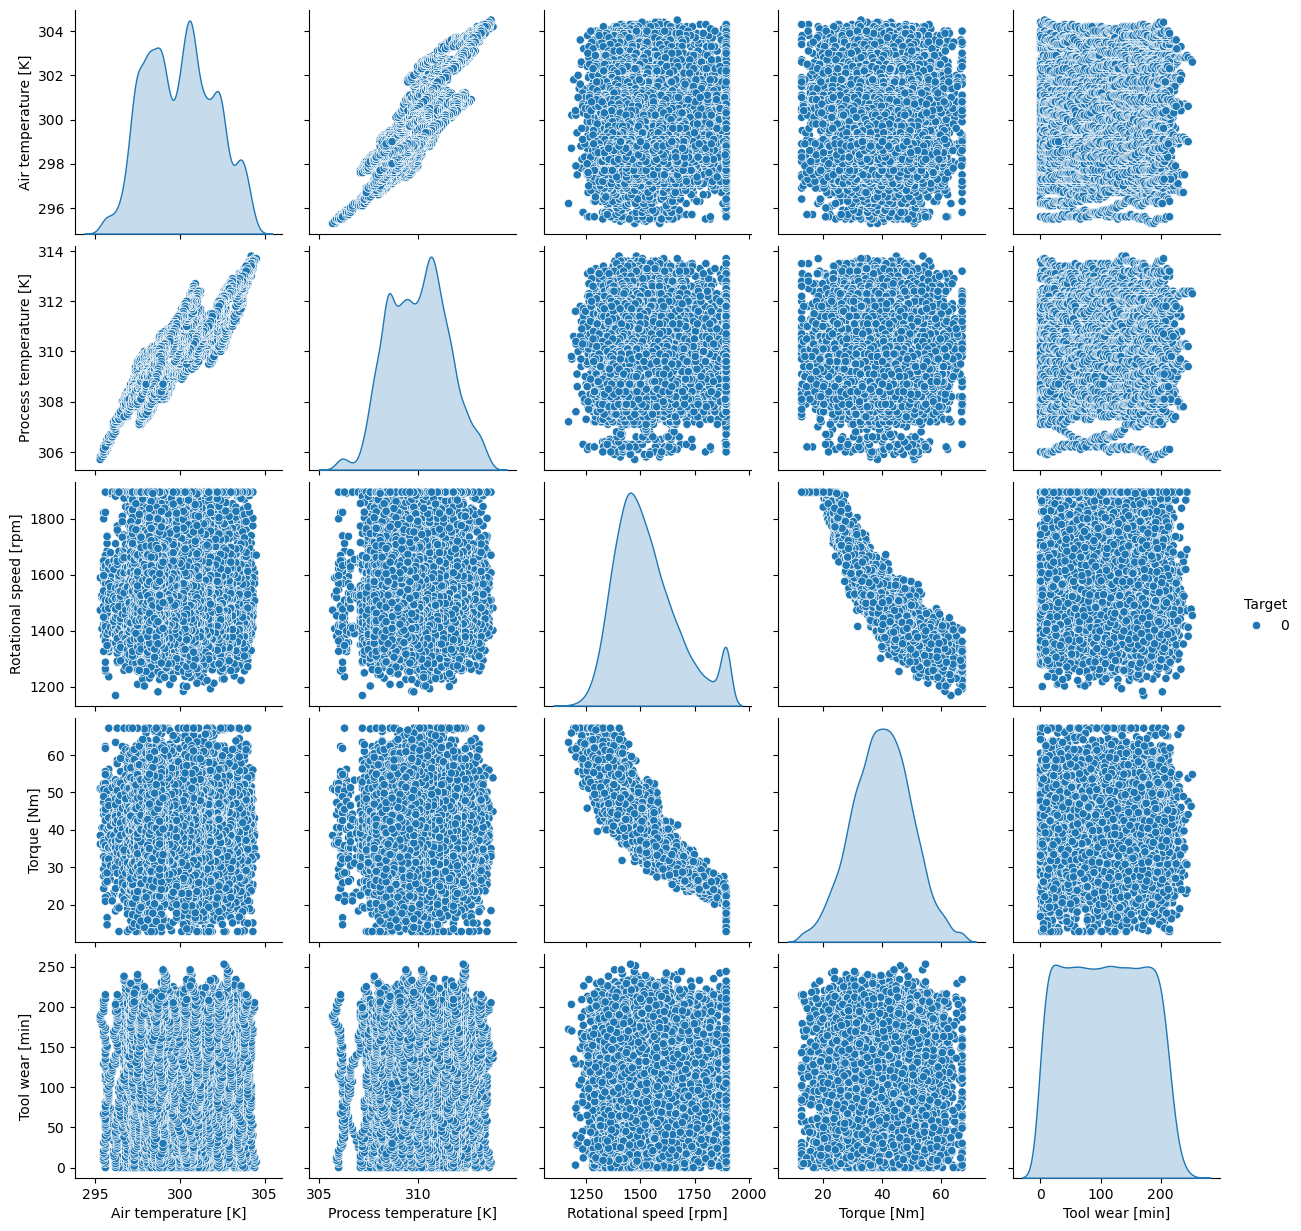

Shape du dataset : (10000, 8)

Statistiques descriptives :
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1530.142500   
std               2.000259                 1.483734              148.798499   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             1895.500000   

        Torque [Nm]  Tool wear [min]   Target  
count  10000.000000     10000.000000  10000.0  
mean      39.983490       107.951000      0.0  
std        9.914623        63.654147      0.0  
min       12.800000         0.000000 

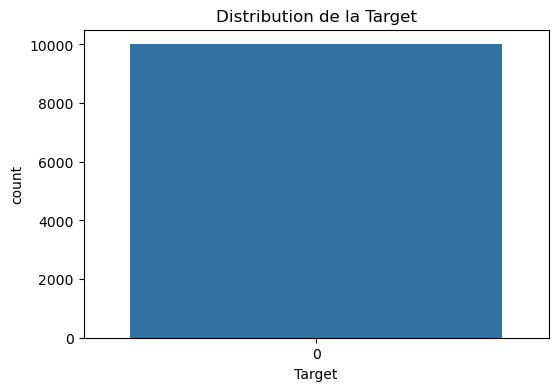

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ 1. Charger la data ------------------
df = pd.read_csv(r"C:\Users\hp\Downloads\predictive_maintenance.csv")

# Supprimer les colonnes inutiles
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

# ------------------ 2. Identifier les colonnes ------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Assurer que Target est catégorielle
if 'Target' in categorical_cols:
    df['Target'] = df['Target'].astype('category')
    categorical_cols.remove('Target')

# ------------------ 3. Traitement des valeurs manquantes ------------------
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# ------------------ 4. Correction des outliers (IQR) ------------------
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(column, lower, upper)

for col in numeric_cols:
    df[col] = remove_outliers_iqr(df[col])

# ------------------ 5. Heatmap des corrélations ------------------
# Encodage des colonnes catégorielles (hors Target) pour corrélation
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation (après encodage)")
plt.show()

# ------------------ 6. Distribution de la target ------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target')
plt.title("Distribution de la Target")
plt.show()

# ------------------ 7. Histogrammes des features numériques ------------------
df[numeric_cols].hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des features numériques")
plt.show()

# ------------------ 8. Boxplots pour visualiser les outliers ------------------
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplots des features numériques")
plt.show()

# ------------------ 9. Pairplot pour quelques features + Target ------------------
# Limiter à 6 premières features numériques pour éviter surcharge
numeric_features = numeric_cols[:6]
pairplot_df = df[numeric_features].copy()
pairplot_df['Target'] = df['Target']  # s'assurer que Target est 1D

sns.pairplot(pairplot_df, hue='Target', diag_kind='kde')
plt.show() # ------------------ 5. Encodage des variables catégorielles pour corrélation/pairplot ------------------
df_encoded = pd.get_dummies(df, drop_first=True)

# ------------------ 6. EDA ------------------

# 6.1 Aperçu général
print("Shape du dataset :", df.shape)
print("\nStatistiques descriptives :")
print(df.describe())

# 6.2 Distribution de la target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target')
plt.title("Distribution de la Target")
plt.show()

# 6.3 Heatmap des corrélations
plt.figure(figsize=(12,10))
corr = df_encoded.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation (après encodage)")
plt.show()

# 6.4 Histogrammes des features numériques
df[numeric_cols].hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des features numériques")
plt.show()

# 6.5 Boxplots pour visualiser les outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplots des features numériques")
plt.show()
# Choisir 6 features numériques scalaires
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns[:6]
cols_for_pairplot = list(numeric_features) + ['Target']

# Créer un nouveau DataFrame pour le pairplot
pairplot_df = df[numeric_features].copy()
pairplot_df['Target'] = df['Target']  # s'assurer que Target est 1D

# Convertir Target en catégorie si ce n'est pas déjà fait
pairplot_df['Target'] = pairplot_df['Target'].astype('category')

# Pairplot
sns.pairplot(pairplot_df, hue='Target', diag_kind='kde')
plt.show()
# ------------------ 5. Encodage des variables catégorielles pour corrélation/pairplot ------------------
df_encoded = pd.get_dummies(df, drop_first=True)

# ------------------ 6. EDA ------------------

# 6.1 Aperçu général
print("Shape du dataset :", df.shape)
print("\nStatistiques descriptives :")
print(df.describe())

# 6.2 Distribution de la target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target')
plt.title("Distribution de la Target")
plt.show()

# 6.3 Heatmap des corrélations

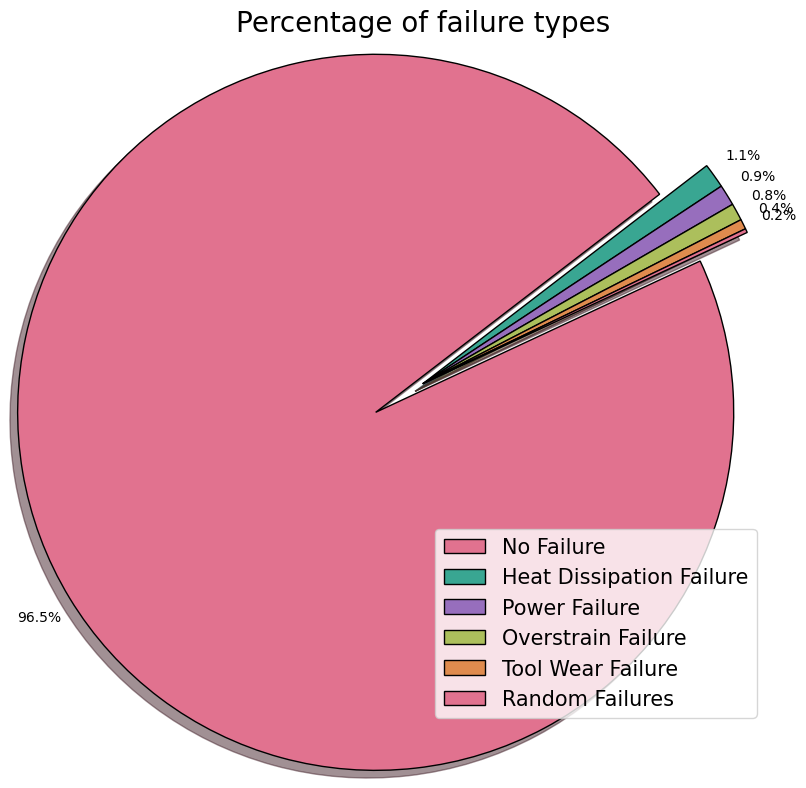

In [20]:
import matplotlib.pyplot as plt

# Liste des types de panne
failure_types = df['Failure Type'].value_counts()

# Générer automatiquement explode (le 1er segment seulement ressort)
explode = [0.2] + [0]*(len(failure_types)-1)

plt.figure(figsize=(8,8))
colors = ['#E1728F', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'][:len(failure_types)]

plt.pie(failure_types,
        explode=explode,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'},
        counterclock=False,
        shadow=True,
        startangle=25,
        pctdistance=1.1,
        radius=1.3,
        colors=colors)

plt.legend(failure_types.index.tolist(), loc='lower right', fontsize=15)
plt.title('Percentage of failure types', fontsize=20)
plt.tight_layout()
plt.show()

In [21]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                  1551.0   
1    L                298.2                    308.7                  1408.0   
2    L                298.1                    308.5                  1498.0   
3    L                298.2                    308.6                  1433.0   
4    L                298.2                    308.7                  1408.0   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure

In [22]:
print(df['Failure Type'].unique())
print(df['Failure Type'].nunique())
print(df[df['Target'] == 1]['Failure Type'].unique())

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
6
['Power Failure' 'Tool Wear Failure' 'Overstrain Failure' 'No Failure'
 'Heat Dissipation Failure']


In [32]:
import pandas as pd
import numpy as np

# ---- Load fresh dataset ----
df = pd.read_csv(r"C:\Users\hp\Downloads\predictive_maintenance.csv")

# Remove useless ID columns
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

# Identify numeric features EXCEPT Target
numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'Target']

# Fill missing numeric values
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# CATEGORICAL
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# -------- Outlier clipping (safe version) --------
def clip_outliers_safe(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.01)
        Q99 = df[col].quantile(0.99)
        df[col] = np.clip(df[col], Q1, Q99)
    return df

df = clip_outliers_safe(df, numeric_cols)

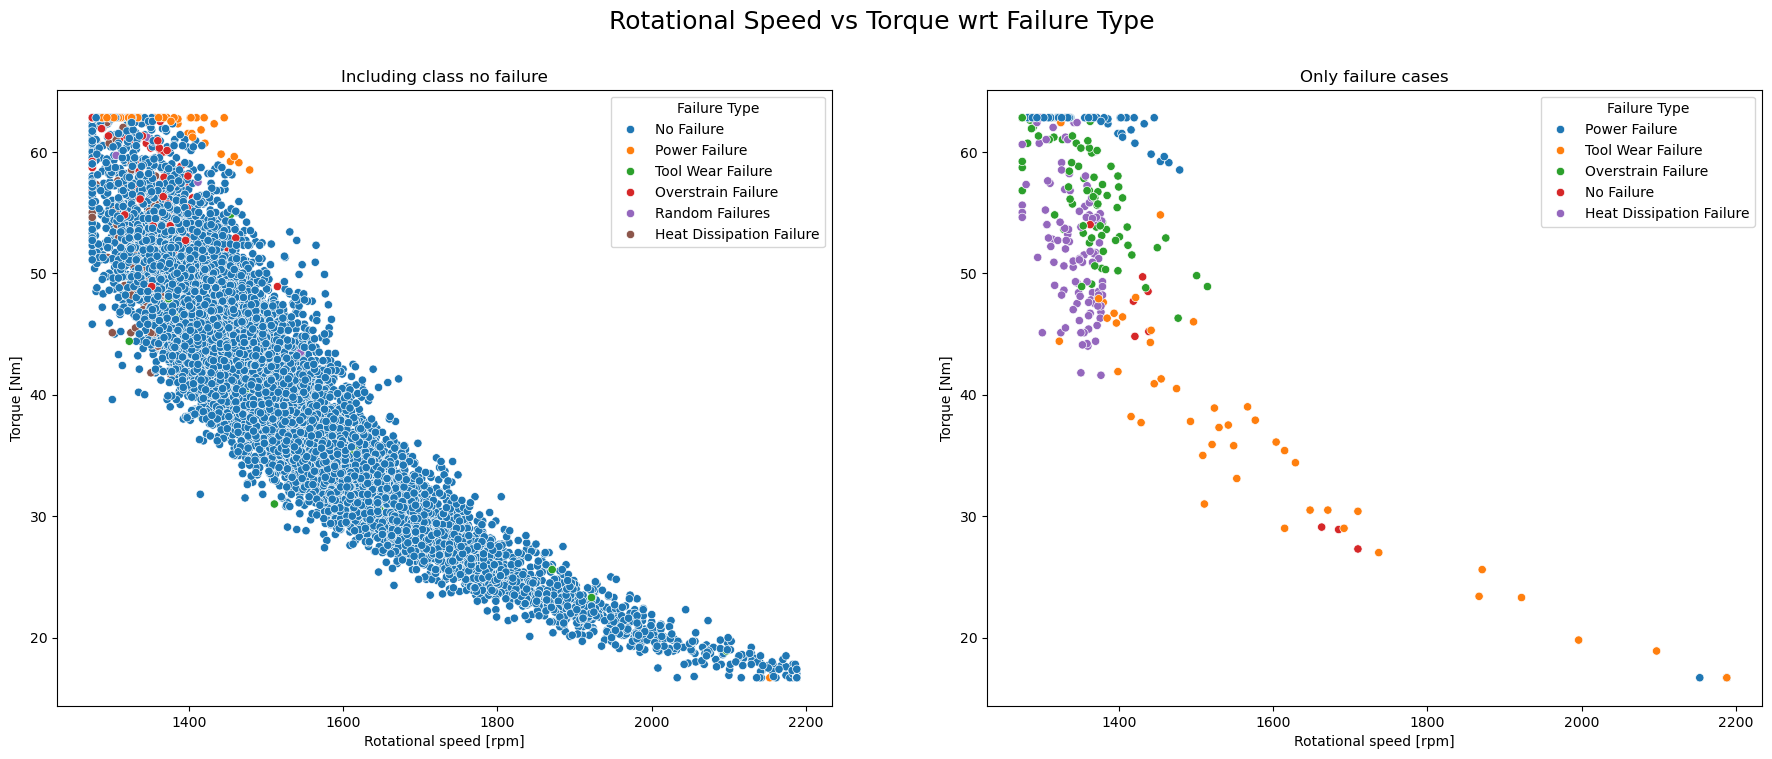

In [33]:
fig, ax = plt.subplots(1, 2, figsize=[22, 8])
plt.suptitle('Rotational Speed vs Torque wrt Failure Type', fontsize=18)

# --- Plot 1 : all data ---
palette_all = sns.color_palette("tab10", df['Failure Type'].nunique())

sns.scatterplot(
    data=df,
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    hue='Failure Type',
    palette=palette_all,
    ax=ax[0])
ax[0].set_title('Including class no failure')

# --- Plot 2 : failures only ---
failure_df = df[df['Target'] == 1]
palette_fail = sns.color_palette("tab10", failure_df['Failure Type'].nunique())
sns.scatterplot(
    data=failure_df,
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    hue='Failure Type',
    palette=palette_fail,
        ax=ax[1])
ax[1].set_title('Only failure cases')
plt.show()

In [52]:
import pandas as pd
#avant la normalisation et encoding
df = pd.read_csv(r"C:\Users\hp\Downloads\predictive_maintenance.csv")
# Vérifier les premières lignes
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [53]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Définir les catégories MANUELLEMENT en respectant TON DATASET
type_categories = ['L', 'M', 'H']
failure_categories = ['No Failure', 'Power Failure', 'Tool Wear Failure',
                      'Overstrain Failure', 'Random Failures', 'Heat Dissipation Failure']

ord_enc = OrdinalEncoder(categories=[type_categories, failure_categories])

new_dat = ord_enc.fit_transform(df[['Type', 'Failure Type']])

df.drop(['Type', 'Failure Type'], axis=1, inplace=True)

new_df = pd.DataFrame(new_dat, index=df.index, columns=['Type', 'Failure Type'])
df = pd.concat([df, new_df], axis=1)
from sklearn.preprocessing import RobustScaler

df_scaled = df.copy()
columns = ['Rotational speed [rpm]', 'Torque [Nm]']
scaler = RobustScaler()
features_scaled = scaler.fit_transform(df[columns])
features_scaled = pd.DataFrame(features_scaled, columns=columns)
df_scaled.drop(columns, axis=1, inplace=True)
df_scaled = pd.concat([df_scaled, features_scaled], axis=1)
df_scaled.head(5)
from sklearn.preprocessing import MinMaxScaler
df.columns = df.columns.str.strip()

columns = ['Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]']
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(df[columns])
features_scaled = pd.DataFrame(features_scaled, columns=columns)
df_scaled.drop(columns, axis=1, inplace=True)
df_scaled = pd.concat([df_scaled, features_scaled], axis=1)
df_scaled.head()


UDI Product ID  Target  Type  Failure Type  Rotational speed [rpm]  \
0    1     M14860       0   1.0           0.0                0.253968   
1    2     L47181       0   0.0           0.0               -0.502646   
2    3     L47182       0   0.0           0.0               -0.026455   
3    4     L47183       0   0.0           0.0               -0.370370   
4    5     L47184       0   0.0           0.0               -0.502646   

   Torque [Nm]  Air temperature [K]  Process temperature [K]  Tool wear [min]  
0     0.198529             0.304348                 0.358025         0.000000  
1     0.455882             0.315217                 0.370370         0.011858  
2     0.683824             0.304348                 0.345679         0.019763  
3    -0.044118             0.315217                 0.358025         0.027668  
4    -0.007353             0.315217                 0.370370         0.035573

In [51]:
#Séparation des features et Target
X = df_scaled.drop(['Target', 'Failure Type'], axis=1)
y = df_scaled['Target']
#Train/Test
from sklearn.model_selection import StratifiedShuffleSplit
#StratifiedShuffleSplit : divise le dataset en train
#25 % des données seront utilisées pour le test, 75 % pour l’entraînement.
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
#Vérification des proportions
print('Target proportion in original dataset:')
print(df['Target'].value_counts(normalize=True))
print('Target proportion in y_train dataset:')
print(y_train.value_counts(normalize=True)) 
print('Target proportion in y_test dataset:')
print(y_test.value_counts(normalize=True))

Target proportion in original dataset:
Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64
Target proportion in y_train dataset:
Target
0    0.966133
1    0.033867
Name: proportion, dtype: float64
Target proportion in y_test dataset:
Target
0    0.966
1    0.034
Name: proportion, dtype: float64



Balanced Random Forest
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91      2413
         1.0       0.88      0.88      0.88        24
         2.0       0.80      0.73      0.76        11
         3.0       0.43      0.95      0.59        20
         4.0       0.00      0.00      0.00         4
         5.0       1.00      0.89      0.94        28

    accuracy                           0.83      2500
   macro avg       0.68      0.71      0.68      2500
weighted avg       0.99      0.83      0.90      2500


Balanced Bagging
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89      2413
         1.0       0.95      0.88      0.91        24
         2.0       0.80      0.73      0.76        11
         3.0       0.69      0.90      0.78        20
         4.0       0.00      0.25      0.00         4
         5.0       0.96      0.86      0.91        28

    accuracy                       

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\m


Easy Ensemble


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\m

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2413
         1.0       0.65      0.83      0.73        24
         2.0       0.78      0.64      0.70        11
         3.0       0.68      0.85      0.76        20
         4.0       0.00      1.00      0.00         4
         5.0       0.89      0.57      0.70        28

    accuracy                           0.03      2500
   macro avg       0.50      0.65      0.48      2500
weighted avg       0.03      0.03      0.02      2500



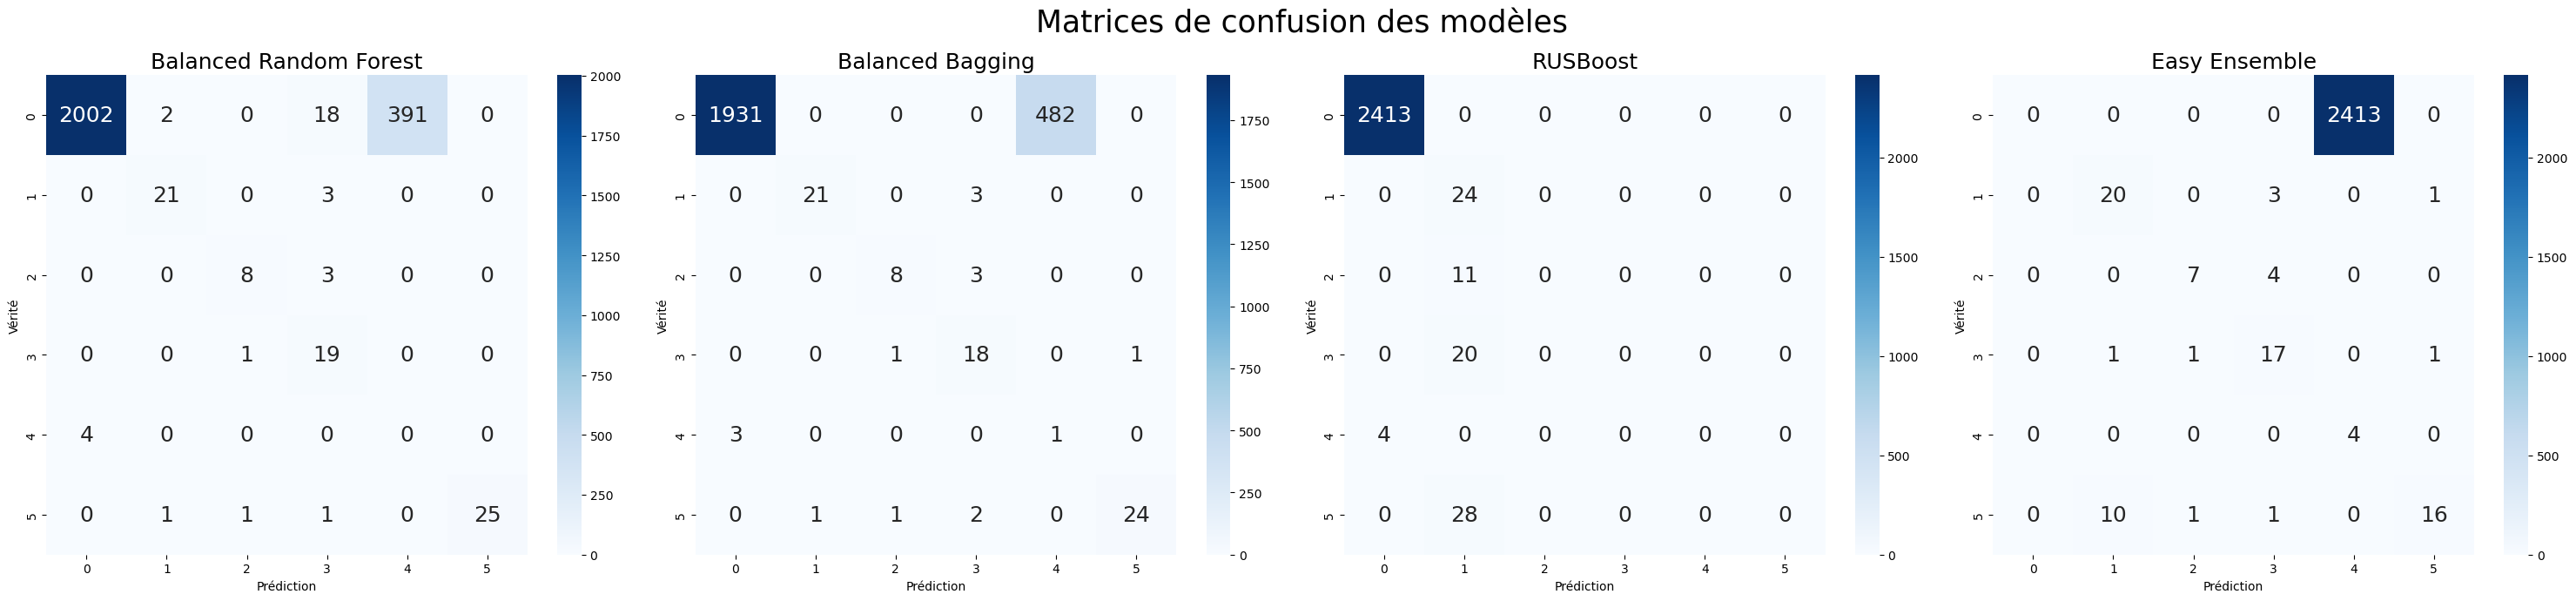



===== Tableau comparatif des modèles =====


Accuracy  Precision  Recall      F1
Balanced Bagging          0.8012     0.7346  0.7349  0.7093
Balanced Random Forest    0.8300     0.6841  0.7125  0.6800
Easy Ensemble             0.0256     0.4989  0.6485  0.4803
RUSBoost                  0.9748     0.2146  0.3333  0.2413

In [63]:
# 1. Importation des librairies
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, RUSBoostClassifier, EasyEnsembleClassifier
import seaborn as sns
import matplotlib.pyplot as plt
# 2. Suppression des colonnes inutiles
df_clean = df.copy()
df_clean.drop(['UDI', 'Product ID'], axis=1, inplace=True)
# 3. Séparation des variables
X = df_clean.drop("Failure Type", axis=1)  # Features
y = df_clean["Failure Type"]               # Target
# 4. Split Train / Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# 5. Déclaration des modèles
models = {"Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),"Balanced Bagging": BalancedBaggingClassifier(random_state=42),
          "RUSBoost": RUSBoostClassifier(random_state=42),
          "Easy Ensemble": EasyEnsembleClassifier(random_state=42)}
results = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1"])
fig, axes = plt.subplots(1, 4, figsize=(30, 7))
fig.suptitle("Matrices de confusion des modèles", fontsize=25)
# 6. Entraînement et Évaluation
for idx, (name, model) in enumerate(models.items()):
    print(f"\n{name}")
    model.fit(X_train, y_train)  # Entraînement
    y_pred = model.predict(X_test)  # Prédiction
    print(classification_report(y_test, y_pred))
    acc = round(accuracy_score(y_test, y_pred), 4)
    prec = round(precision_score(y_test, y_pred, average="macro"), 4)
    rec = round(recall_score(y_test, y_pred, average="macro"), 4)
    f1 = round(f1_score(y_test, y_pred, average="macro"), 4)
    results.loc[name] = [acc, prec, rec, f1]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                ax=axes[idx], annot_kws={"size": 18})
    axes[idx].set_title(name, fontsize=18)
    axes[idx].set_xlabel("Prédiction")
    axes[idx].set_ylabel("Vérité")
plt.tight_layout()
plt.show()
print("\n\n===== Tableau comparatif des modèles =====")
display(results.sort_values(by="F1", ascending=False))